<a href="https://colab.research.google.com/github/lokeshpara/samplegit/blob/S9/S9Quizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 10:45:38.058206


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA/S9Quizz/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA/S9Quizz


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torchvision.transforms as transforms
import quizzloader as d
import QuizDNN as dnn
import quizztrain_test as t

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


plane   dog  deer  deer


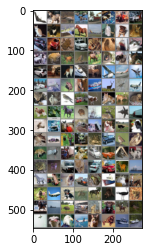

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(d.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = dnn.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1, 64,

In [7]:
model =  dnn.QuizDNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=0)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
loss_func=nn.CrossEntropyLoss()
 
for epoch in range(10):
    print("Epoch:", epoch)
    t.train(model, device, d.train_loader, optimizer, loss_func, epoch, l1=False)
    # scheduler.step()
    t.test(model, device, d.test_loader, nn.CrossEntropyLoss(reduction='sum'))

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch: 0


Loss=0.9658675193786621 Batch_id=390 Accuracy=55.47: 100%|██████████| 391/391 [00:19<00:00, 20.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9649, Accuracy: 6490/10000 (64.90%)

Epoch: 1


Loss=0.7746353149414062 Batch_id=390 Accuracy=72.29: 100%|██████████| 391/391 [00:19<00:00, 20.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8000, Accuracy: 7146/10000 (71.46%)

Epoch: 2


Loss=0.5469943881034851 Batch_id=390 Accuracy=79.14: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6572, Accuracy: 7726/10000 (77.26%)

Epoch: 3


Loss=0.46281784772872925 Batch_id=390 Accuracy=83.29: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6032, Accuracy: 7941/10000 (79.41%)

Epoch: 4


Loss=0.4871289134025574 Batch_id=390 Accuracy=86.01: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5883, Accuracy: 7979/10000 (79.79%)

Epoch: 5


Loss=0.7662757039070129 Batch_id=390 Accuracy=88.26: 100%|██████████| 391/391 [00:19<00:00, 20.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5422, Accuracy: 8194/10000 (81.94%)

Epoch: 6


Loss=0.19094060361385345 Batch_id=390 Accuracy=90.39: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6413, Accuracy: 8037/10000 (80.37%)

Epoch: 7


Loss=0.14946511387825012 Batch_id=390 Accuracy=92.17: 100%|██████████| 391/391 [00:19<00:00, 20.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5516, Accuracy: 8257/10000 (82.57%)

Epoch: 8


Loss=0.2169349491596222 Batch_id=390 Accuracy=93.40: 100%|██████████| 391/391 [00:19<00:00, 20.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5766, Accuracy: 8256/10000 (82.56%)

Epoch: 9


Loss=0.20138387382030487 Batch_id=390 Accuracy=94.62: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Test set: Average loss: 0.6263, Accuracy: 8167/10000 (81.67%)



In [8]:
from datetime import datetime 
print("Current exist Date/Time: ", datetime.now())

Current exist Date/Time:  2020-03-21 10:51:36.233692
